In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import math

%matplotlib inline

### Problem Statement:

A company conducts an annual employee satisfaction survey that scores employee happiness on a scale from 1 to 100. The company aims for a mean satisfaction score of at least 75 to ensure a positive work environment. After the latest survey, the HR department wants to know if the current mean satisfaction score significantly differs from the goal.

Hypotheses:

Null Hypothesis: The mean satisfaction score is 75 (no difference).

Alternative Hypothesis: The mean satisfaction score is not 75 (there is a difference).

In [5]:
np.random.seed(42)
satisfaction_score = np.random.normal(loc=73, scale=10, size=500)
df_satisfaction = pd.DataFrame({'Employee_Satisfaction': satisfaction_score})
df_satisfaction.to_csv('employee_satisfaction.csv', index=False)

In [6]:
df_satisfaction.head()

,Employee_Satisfaction
0,77.967142
1,71.617357
2,79.476885
3,88.230299
4,70.658466


In [8]:
df_satisfaction.describe()

,Employee_Satisfaction
count,500.000000
mean,73.068380
std,9.812532
min,40.587327
25%,65.996926
50%,73.127971
75%,79.367833
max,111.527315


In [9]:
df_satisfaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 1 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Employee_Satisfaction  500 non-null    float64
dtypes: float64(1)
memory usage: 4.0 KB


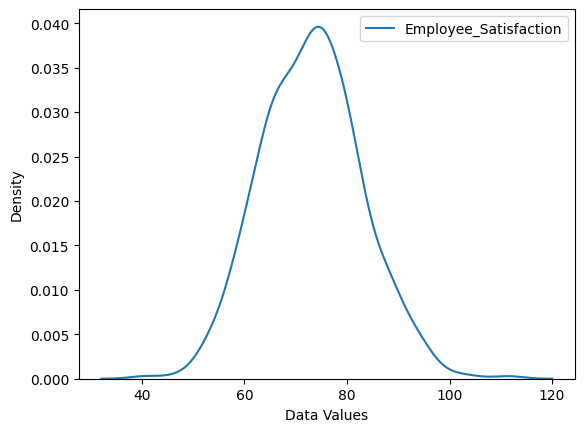

In [10]:
sns.kdeplot(df_satisfaction)

plt.xlabel('Data Values')
plt.ylabel('Density')

plt.show()

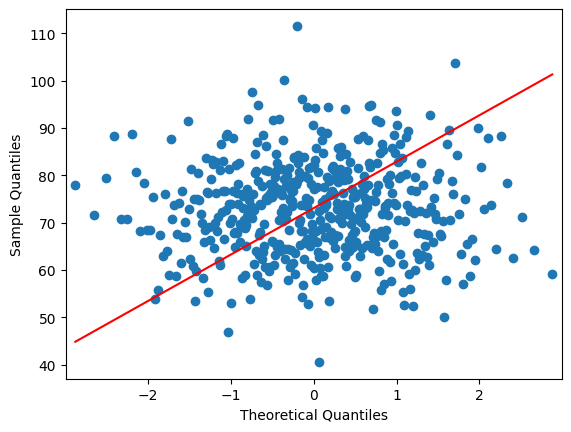

In [11]:
sm.qqplot(df_satisfaction, line='s')

plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')

plt.show()

In [12]:
def check_p_val(p_val, alpha):

    if p_val < alpha:
        print('We have evidence to reject the null hypothesis.')
    else:
        print('We do not have evidence to reject the null hypothesis.')

In [13]:
stats, p_val = stats.normaltest(df_satisfaction['Employee_Satisfaction'])

In [16]:
print(p_val)
check_p_val(p_val, 0.05)

0.12102524501156255
We do not have evidence to reject the null hypothesis.


In [17]:
len(df_satisfaction)

500

In [21]:
stats.ttest_1samp(a=df_satisfaction['Employee_Satisfaction'], popmean=75)

TtestResult(statistic=-4.401752309418757, pvalue=1.3142259404815688e-05, df=499)

In [23]:
stats.t.ppf(q=0.025, df=499)

-1.9647293909876653

In [24]:
stats.t.ppf(q=0.975, df=499)

1.9647293909876649

In [25]:
stats.t.cdf(x=-4.401752309418757, df=499) * 2

1.3142259404815688e-05

In [33]:
sigma = df_satisfaction['Employee_Satisfaction'].std()/math.sqrt(500)

stats.t.interval(0.95, df = 499, loc = df_satisfaction['Employee_Satisfaction'].mean(), scale= sigma)

(72.20619815423558, 73.93056173753735)

In [35]:
stats.t.interval(confidence = 0.99, df = 499, loc = df_satisfaction['Employee_Satisfaction'].mean(), scale= sigma)

(71.93368999064143, 74.2030699011315)